Data is obtained from the Diffbot site.

What is **Diffbot**?

[Diffbot](https://www.diffbot.com/) is a tool that allows you to extract a trillion connected facts across the web in one click in less than 1 second.
To start with Diffbot, sign up for a 14-day free trial. This free trial will give you access to search the world’s largest Knowledge Graph and allow you to extract data from any webpage without creating rules.

Then click the Search option to search the Diffbot Knowledge Graph.

In [28]:
!pip install scattertext

In [3]:
# Download from Google Drive
import gdown

url = "https://drive.google.com/uc?id=1pE7iIWxhjqIQesIBApMvZTJlRqjA8WNN"
output = "data-science-job-search.csv"
gdown.download(url, output)
# data-science-job-search.csv

url = "https://drive.google.com/uc?id=1yilShPE4V905GZ96FctJW04wkrZPZgnE"
output = "data-engineer-job-search.csv"
gdown.download(url, output)

Downloading...
From: https://drive.google.com/uc?id=1pE7iIWxhjqIQesIBApMvZTJlRqjA8WNN
To: /content/data-science-job-search.csv
100%|██████████| 3.81M/3.81M [00:00<00:00, 153MB/s]
Downloading...
From: https://drive.google.com/uc?id=1yilShPE4V905GZ96FctJW04wkrZPZgnE
To: /content/data-engineer-job-search.csv
100%|██████████| 3.96M/3.96M [00:00<00:00, 186MB/s]


'data-engineer-job-search.csv'

In [4]:
import pandas as pd

data_scientist = pd.read_csv("data-science-job-search.csv")
data_engineer = pd.read_csv("data-engineer-job-search.csv")

In [5]:
data_scientist.head()

,name,pageUrl,requirements,summary,tasks,text,title
0,"Results for ""Senior Data Scientist Jobs in Uni...",https://www.linkedin.com/jobs/senior-data-scie...,NaN,"\n3,000+Results for ""Senior Data Scientist Job...",NaN,"\n3,000+Results for ""Senior Data Scientist Job...","Results for ""Senior Data Scientist Jobs in Uni..."
1,Data Scientist,https://www.linkedin.com/jobs/view/872319287/,"2+ years of relevant experience preferred.,Hea...",Equian is looking to hire a Data Scientist to ...,Lead effort to determine overpayments from con...,Equian is looking to hire a Data Scientist to ...,Data Scientist
2,"Data Scientist, New Grad 2019 - Analytics",https://www.linkedin.com/jobs/view/918212908/?...,"Pursuing a PhD or MS in CS, Math, Statistics, ...",Job description\nIn order to be considered for...,"Analysis:,Deep dive analysis into Airbnb’s vas...",Job description\nIn order to be considered for...,"Data Scientist, New Grad 2019 - Analytics"
3,Postdoc Positions in Single Cell Genomics - Da...,http://www.nature.com/naturejobs/science/jobs/...,NaN,\nSingle Cell Data Scientist – Postdoc\nSingle...,NaN,\nSingle Cell Data Scientist – Postdoc\nSingle...,Postdoc Positions in Single Cell Genomics - Da...
4,Principal Data Scientist,https://www.nature.com/naturecareers/job/princ...,"PhD or MS in computational biology, computer s...",The Immunology and Inflammation Research and E...,Lead projects to Identify candidate therapeuti...,The Immunology and Inflammation Research and E...,Principal Data Scientist


In [6]:
data_engineer.head()

,name,pageUrl,requirements,resolvedPageUrl,summary,tasks,text,title
0,"Results for ""Data Engineer Jobs in New York, U...",https://www.linkedin.com/jobs/data-engineer-jo...,NaN,NaN,NaN,NaN,NaN,"Results for ""Data Engineer Jobs in New York, U..."
1,"Results for ""Data Engineer Jobs in Portland, O...",https://www.linkedin.com/jobs/data-engineer-jo...,NaN,NaN,NaN,NaN,NaN,"Results for ""Data Engineer Jobs in Portland, O..."
2,Staff Data Engineer,https://www.linkedin.com/jobs/view/staff-data-...,NaN,https://www.linkedin.com/jobs/view/staff-data-...,About Us\nVenmo was founded on the principles ...,NaN,About Us\nVenmo was founded on the principles ...,Staff Data Engineer
3,Senior Data Engineer - Customer Operations Data,https://www.linkedin.com/jobs/view/senior-data...,Experience with end-to-end ETL work using Pyth...,https://www.linkedin.com/jobs/view/senior-data...,Squarespace’s Customer Operations Data Enginee...,"Build end-to-end data pipelines, consuming fro...",Squarespace’s Customer Operations Data Enginee...,Senior Data Engineer - Customer Operations Data
4,"Results for ""Data Engineer Jobs in San Diego, ...",https://www.linkedin.com/jobs/data-engineer-jo...,NaN,NaN,NaN,NaN,NaN,"Results for ""Data Engineer Jobs in San Diego, ..."


In [7]:
data_scientist["title"] = ["data scientist"] * len(data_scientist)
data_engineer["title"] = ["data engineer"] * len(data_scientist)

df = pd.concat([data_scientist, data_engineer]).reset_index(drop=True)

In [8]:
df = df[~df.text.isna()]

In [10]:
#Top Page Sources
!pip install yarl

     |████████████████████████████████| 271 kB 5.4 MB/s 
     |████████████████████████████████| 94 kB 3.6 MB/s 


In [11]:
from yarl import URL

def get_page_source(url: str):
    return URL(url).host
    
df["page_host"] = df["pageUrl"].apply(get_page_source)

In [12]:
#Then visualize the top 20 pages:
import plotly.express as px

top_pages = df["page_host"].value_counts()[:20].to_frame()

fig = px.histogram(
    top_pages,
    x=top_pages.index,
    y="page_host",
    labels={"sum of page_host": "frequency", "index": "page host"},
).update_xaxes(
    categoryorder="total descending",
)

fig

In [13]:
!pip install texthero

In [14]:
import texthero as hero

# Clean text
df["text"] = df["text"].pipe(hero.clean)
#df["requirements"] = df["requirements"].pipe(hero.clean)
#df["tasks"] = df["tasks"].pipe(hero.clean)


# Turn a list of text into a string
text = " ".join(df["text"].values)

In [16]:
!pip install wordcloud

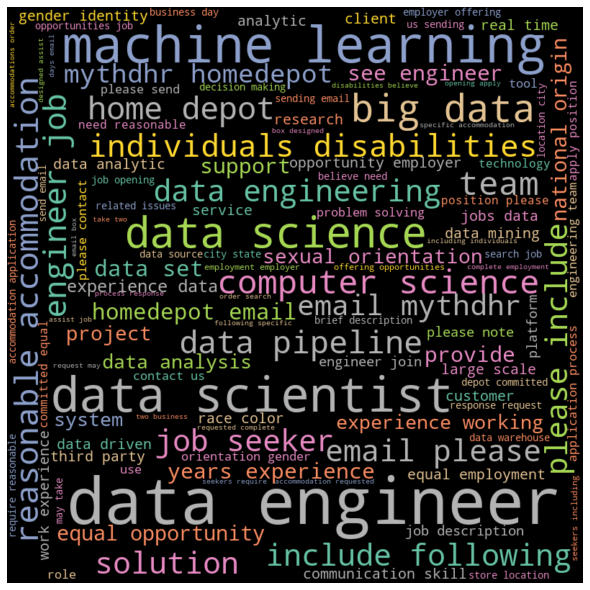

In [18]:

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

%matplotlib inline


def make_wordcloud(new_text):
    """'function to make wordcloud"""

    wordcloud = WordCloud(
        width=800,
        height=800,
        min_font_size=10,
        background_color="black",
        colormap="Set2"
    ).generate(new_text)

    fig = plt.figure(figsize=(8, 8), facecolor=None)
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.tight_layout(pad=0)

    plt.show()

    return fig

text_cloud = make_wordcloud(text)

In [20]:
!pip install scattertext

     |████████████████████████████████| 7.3 MB 4.7 MB/s 
     |████████████████████████████████| 24.1 MB 1.2 MB/s 
  Created wheel for flashtext: filename=flashtext-2.7-py2.py3-none-any.whl size=9309 sha256=1bebb7d7fbe9471bf97e66ade26badd4baa8ae65af137f7e9d0d3f6c8ed4c0e5
  Stored in directory: /root/.cache/pip/wheels/cb/19/58/4e8fdd0009a7f89dbce3c18fff2e0d0fa201d5cdfd16f113b7
Successfully built flashtext
  Attempting uninstall: gensim
    Found existing installation: gensim 3.6.0
    Uninstalling gensim-3.6.0:
      Successfully uninstalled gensim-3.6.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
texthero 1.1.0 requires gensim<4.0,>=3.6.0, but you have gensim 4.1.2 which is incompatible.


In [21]:
#What we are really interested in is the difference between the job requirements of data scientists and data engineers
import scattertext as st

analyze_col = "requirements"

# Filter out the rows whose requirement is nan
filtered_df = df[~df[analyze_col].isna()][["title", analyze_col, "page_host"]]

# Tokenize text
filtered_df["parse"] = filtered_df[analyze_col].apply(st.whitespace_nlp_with_sentences)

In [27]:
filtered_df["parse"]

1       (2, +, years, of, relevant, experience, prefer...
2       (pursuing, a, phd, or, ms, in, cs, ,, math, ,,...
4       (phd, or, ms, in, computational, biology, ,, c...
5       (bachelor, ’, s, degree, from, an, accredited,...
6       (strong, working, knowledge, of, a, variety, o...
                              ...                        
1990    (at, least, three, years, working, as, a, data...
1992                                         (li, -, pa1)
1994    (working, for, a, truly, global, company, with...
1995    (monthly, team, outings, (, ball, games, ,, ha...
1998    (at, least, 5, years, experience, developing, ...
Name: parse, Length: 864, dtype: object

In [22]:
#Build a corpus:
corpus = (
    st.CorpusFromParsedDocuments(filtered_df, category_col="title", parsed_col="parse")
    .build()
    .get_unigram_corpus()
    .compact(st.AssociationCompactor(2000))
)

In [23]:
#we get the scaled F-score of each term in each category.
import nltk
nltk.download("averaged_perceptron_tagger")

# get DataFrame with terms and their frequency
term_freq_df = corpus.get_term_freq_df()

# Get scaled F-scores of each term in each category
term_freq_df["Data Scientist Score"] = corpus.get_scaled_f_scores("data scientist")
term_freq_df["Data Engineer Score"] = corpus.get_scaled_f_scores("data engineer")

# Remove terms that are not nouns
def is_noun(word: str):
    pos = nltk.pos_tag([word])[0][1]
    return pos[:2] == "NN"

term_freq_df = term_freq_df.loc[map(is_noun, term_freq_df.index)]

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


In [24]:
#Get terms with the highest data scientist F-scores:

term_freq_df.sort_values(by="Data Scientist Score", ascending=False).index[:30]

Index(['science', 'analysis', 'machine', 'ability', 'computer', 'work', 's',
       'field', 'r', 'degree', 'statistics', 'quantitative', 'experience',
       'years', 'python', 'data', 'knowledge', 'techniques', 'business',
       'analytics', 'skills', 'bachelor', 'math', 'engineering', 'master',
       'mining', 'development', 'time', 'environment', 'languages'],
      dtype='object', name='term')

In [25]:
term_freq_df.sort_values(by="Data Engineer Score", ascending=False).index[:30]

Index(['self', 'spark', 'design', 'excellent', 'g', 'implement', 'java', 'sql',
       'scala', 'technologies', 'etc', 'e', 'dimensional', 'management',
       'hadoop', 'systems', 'hands', 'sets', 'growth', 'datasets', 'operating',
       'mapreduce', 'aws', 'industry', 'verbal', 'perfect', 'enemy', 'etl',
       'ambiguity', 'awareness'],
      dtype='object', name='term')

In [26]:
html = st.produce_scattertext_explorer(
    corpus,
    category="data scientist",
    category_name="Data scientist",
    not_category_name="Data Engineer",
    minimum_term_frequency=5,
    pmi_threshold_coefficient=0,
    width_in_pixels=1000,
    metadata=corpus.get_df()["page_host"],
    transform=st.Scalers.dense_rank,
)
open("data_science_vs_data_engineer_requirements_terms.html", "w").write(html)

1305733